## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [5]:
## Loading data
bike_sharing = pd.read_csv("day.csv");

In [6]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Inspect the various aspects of the housing dataframe

In [7]:
print(bike_sharing.shape) ## print shape
print(bike_sharing.columns) ## print columns
print(bike_sharing.info()) ## print info
print(bike_sharing.describe()) ## describe data

(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 n

## Cleaning the bike sharing data

In [8]:
## checking null values
bike_sharing.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Analysis showed that there are no missing values in the dataset.

In [9]:
bike_sharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

The columns season, yr, mnth, holiday, weekday, workingday, and weathersit have relatively fewer unique values, indicating categorical data. The rest are more continuous in nature with many unique values.

In [10]:
## checking data types
bike_sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

All columns have appropriate data types for their respective data except dteday column

### Droping columns not required for modeling

Considering `casual` and `registered` columns in the model might not be appropriate because `cnt` is indeed the sum of `casual` and `registered`. Including both `casual` and `registered` would lead to perfect multicollinearity in the model since:

cnt=casual+registered

This multicollinearity can distort the model's coefficients and their interpretations. To avoid this issue, we should exclude the `casual` and `registered` columns from the model.

In [11]:
# Droping instant column as it is index column which has nothing to do with target
bike_sharing_cleaned = bike_sharing;
bike_sharing_cleaned.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_sharing_cleaned.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_sharing_cleaned.drop(['casual'], axis = 1, inplace = True)
bike_sharing_cleaned.drop(['registered'], axis = 1, inplace = True)

In [12]:
bike_sharing_cleaned.shape

(730, 12)

### Dealing with Categorical values as mentioned in problem statement:

In [13]:
## Using short form of wethersiuation
# Clear = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# Mist/Cloudy = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# Light Snow/Rain = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# Heavy Rain/Snow = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_sharing_cleaned['season'] = bike_sharing_cleaned['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_sharing_cleaned['weathersit'] = bike_sharing_cleaned['weathersit'].map({
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})
bike_sharing_cleaned['mnth'] = bike_sharing_cleaned.mnth.replace({1: 'Jan',2: 'Feb',3: 'March',4: 'April',5: 'May',6: 'Jun', 7: 'July',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
# Convert 'season' and 'weathersit' to categorical type
bike_sharing_cleaned['season'] = bike_sharing_cleaned['season'].astype('category')
bike_sharing_cleaned['weathersit'] = bike_sharing_cleaned['weathersit'].astype('category')
bike_sharing_cleaned['mnth'] = bike_sharing_cleaned['mnth'].astype('category')
bike_sharing_cleaned.weekday = bike_sharing_cleaned.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bike_sharing_cleaned[['yr']] = bike_sharing_cleaned[['yr']].apply(lambda x: x.map({1:'2019', 0:'2018'}))
bike_sharing_cleaned[['holiday']] = bike_sharing_cleaned[['holiday']].apply(lambda x: x.map({1:'Yes', 0:'No'}))
bike_sharing_cleaned[['workingday']] = bike_sharing_cleaned[['workingday']].apply(lambda x: x.map({1:'Yes', 0:'No'}))

## Step 2: Visualising the Data

### Univariate Analysis - Continuous

#### Checking Correlation

In [14]:
bike_sharing_cleaned.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

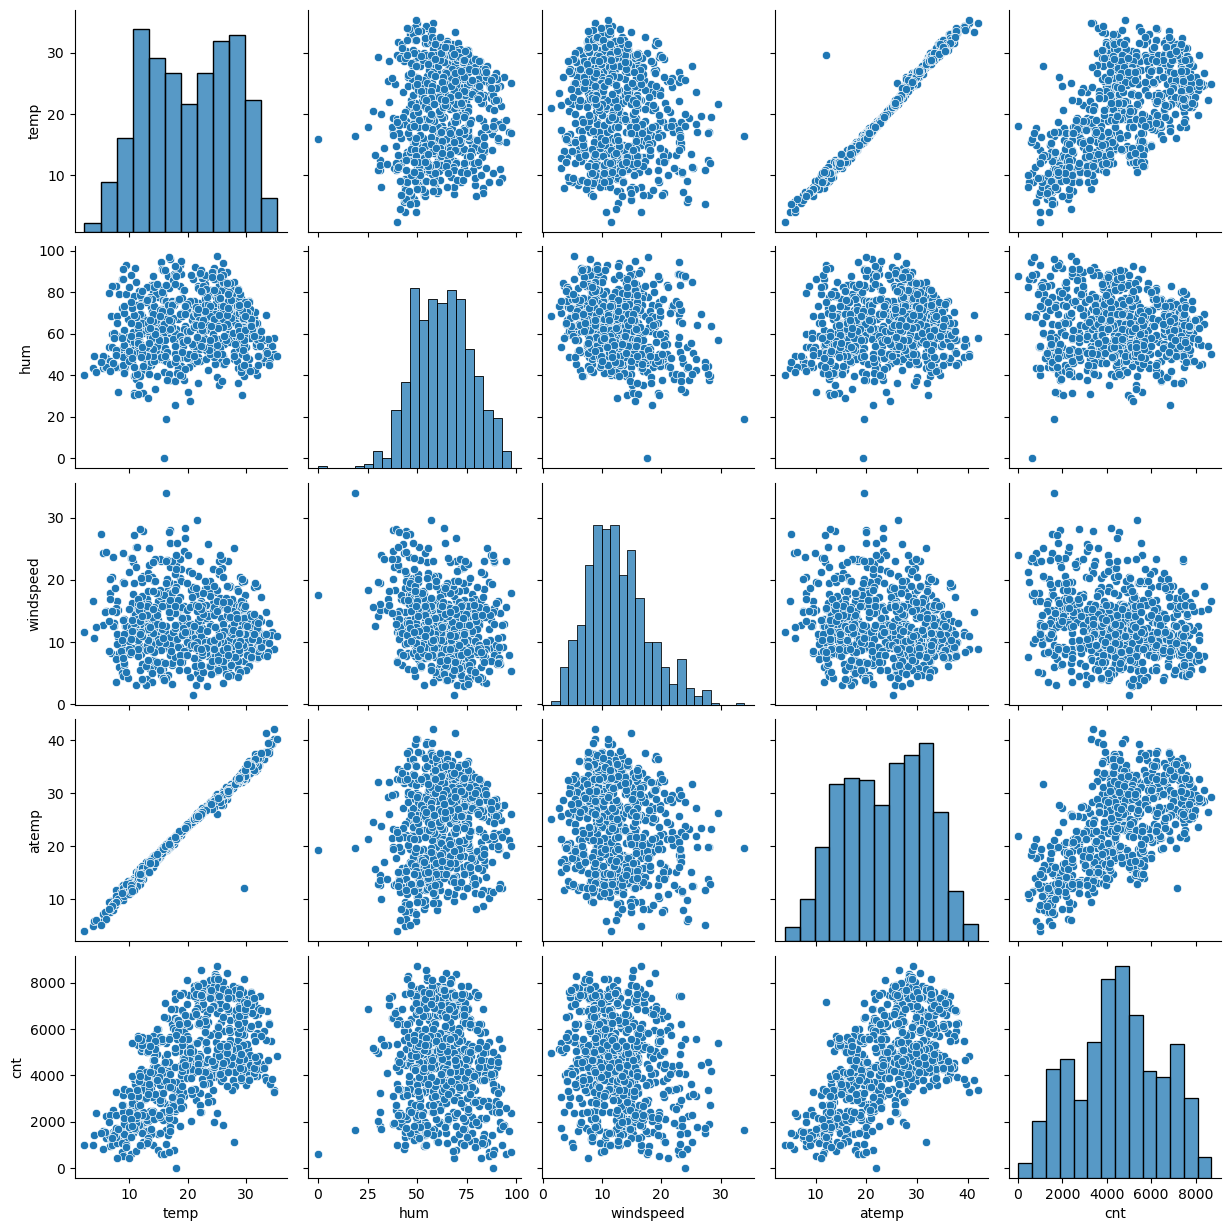

In [15]:
# pair plot for numerical features
numerical_cols = ['temp', 'hum', 'windspeed', 'atemp', 'cnt']

# Generate the pair plot
sns.pairplot(bike_sharing_cleaned[numerical_cols])
plt.show()

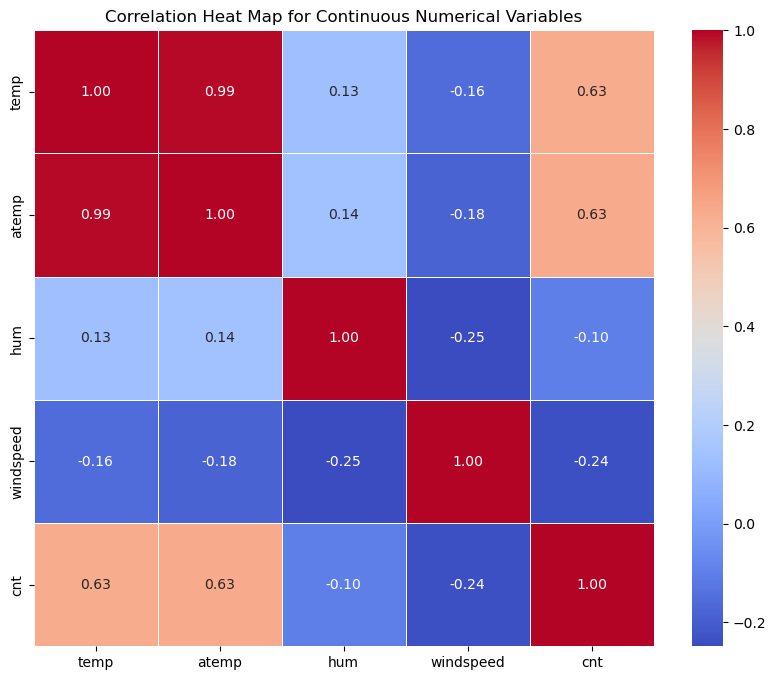

In [16]:
# Generate a heat map 
numerical_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(10, 8))
sns.heatmap(bike_sharing_cleaned[numerical_col].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heat Map for Continuous Numerical Variables')
plt.show()

**Strong Positive Correlation between `temp` and `atemp`**:
   - Correlation Coefficient: **0.99**
   - Conclusion: The extremely high correlation between `temp` (temperature) and `atemp` (feeling temperature) indicates that these two variables are almost identical in the context of this dataset. This redundancy suggests that including both variables in the model may not provide additional predictive power, and one of them could potentially be removed to simplify the model without losing information.

In [17]:
## droping atemp column
bike_sharing_cleaned.drop(['atemp'], axis = 1, inplace = True)

In [18]:
bike_sharing_cleaned.shape

(730, 11)

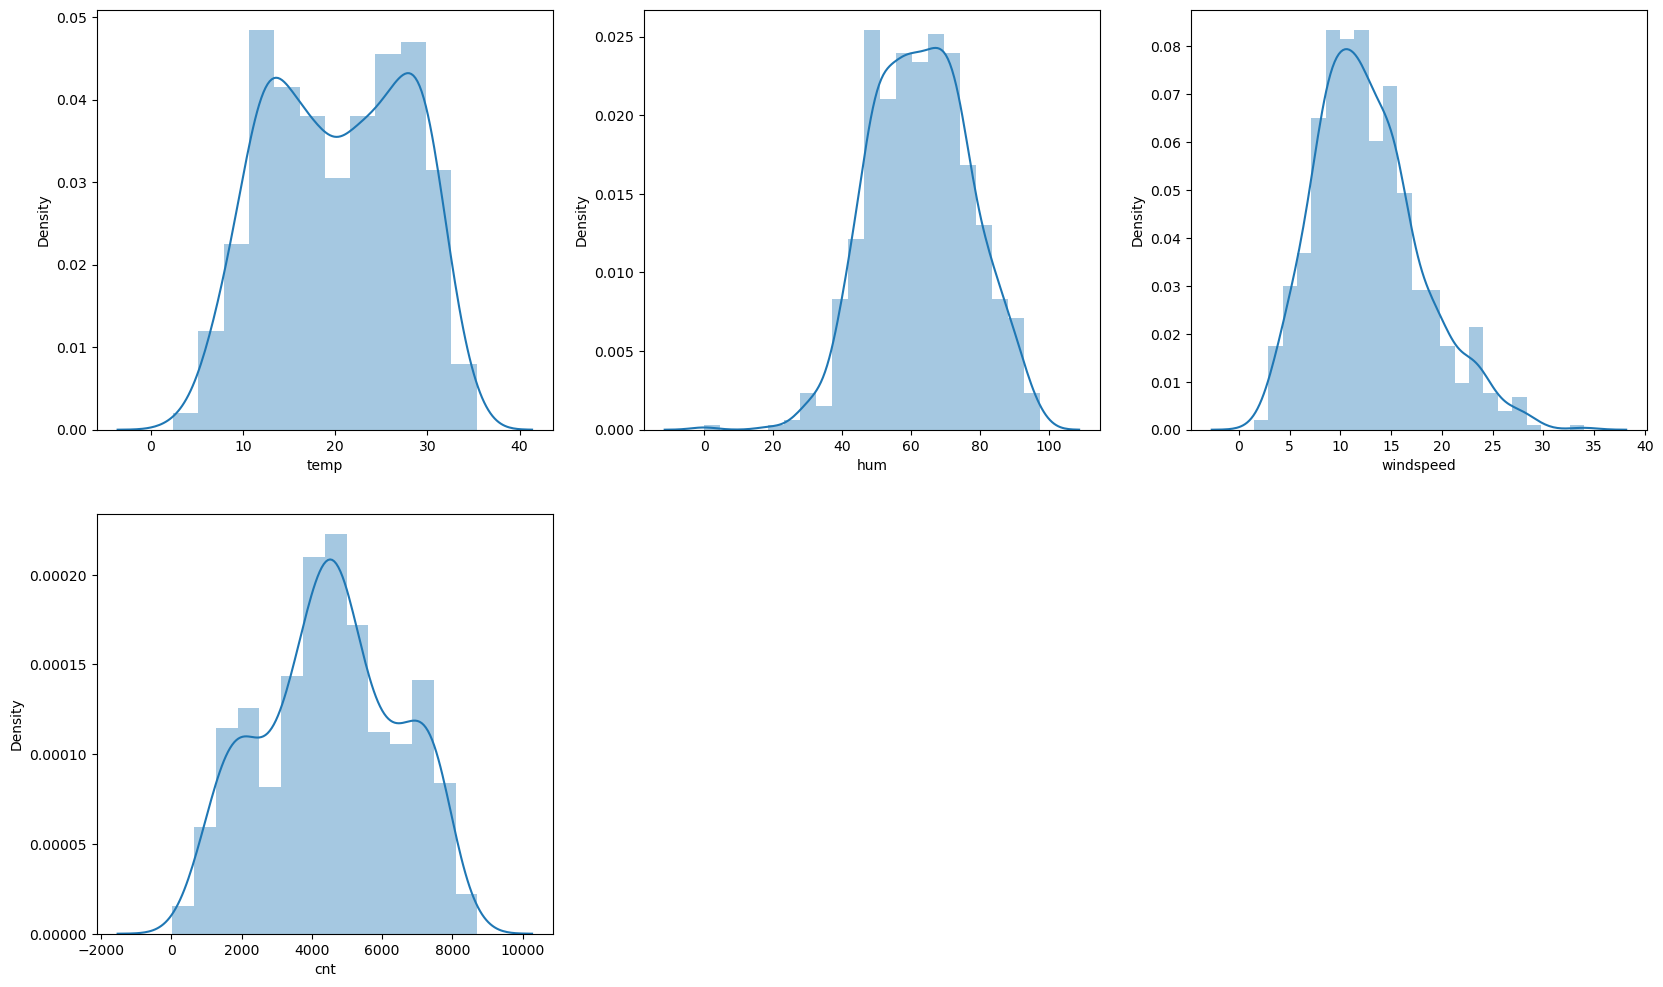

In [19]:
# Visualise the distribution of numerical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(bike_sharing_cleaned['temp'])
plt.subplot(2,3,2)
sns.distplot(bike_sharing_cleaned['hum'])
plt.subplot(2,3,3)
sns.distplot(bike_sharing_cleaned['windspeed'])
plt.subplot(2,3,4)
sns.distplot(bike_sharing_cleaned['cnt'])

plt.show()

<Figure size 1000x1200 with 0 Axes>

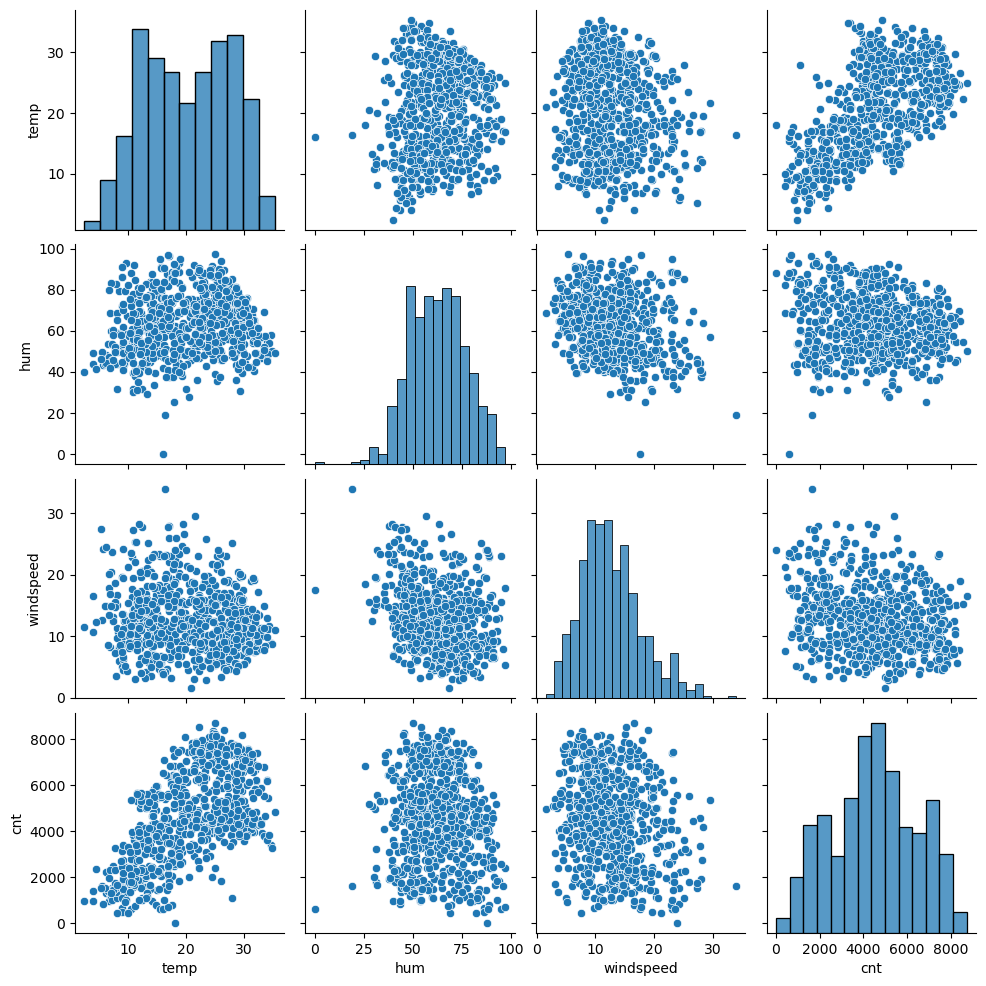

In [20]:
# pair plot for numerical features
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(10, 12))
# Generate the pair plot
sns.pairplot(bike_sharing_cleaned[numerical_cols])
plt.show()

#### Analysis - There is no strong multicollinearity observed among the other numerical columns.

- Most of the days have temperature 10-30 degrees.
- Distribution of temp and atemp are almost similar.
- Most of the days are with humidity 50-80.
- Wind speed seems to be distributed mostly between 5 - 20.
- Total count of rental bikes seems to be normally distributed with a mean value between 4000-5000.

### Visualising Categorical Variables

#### Univariate Analysis - Categorical

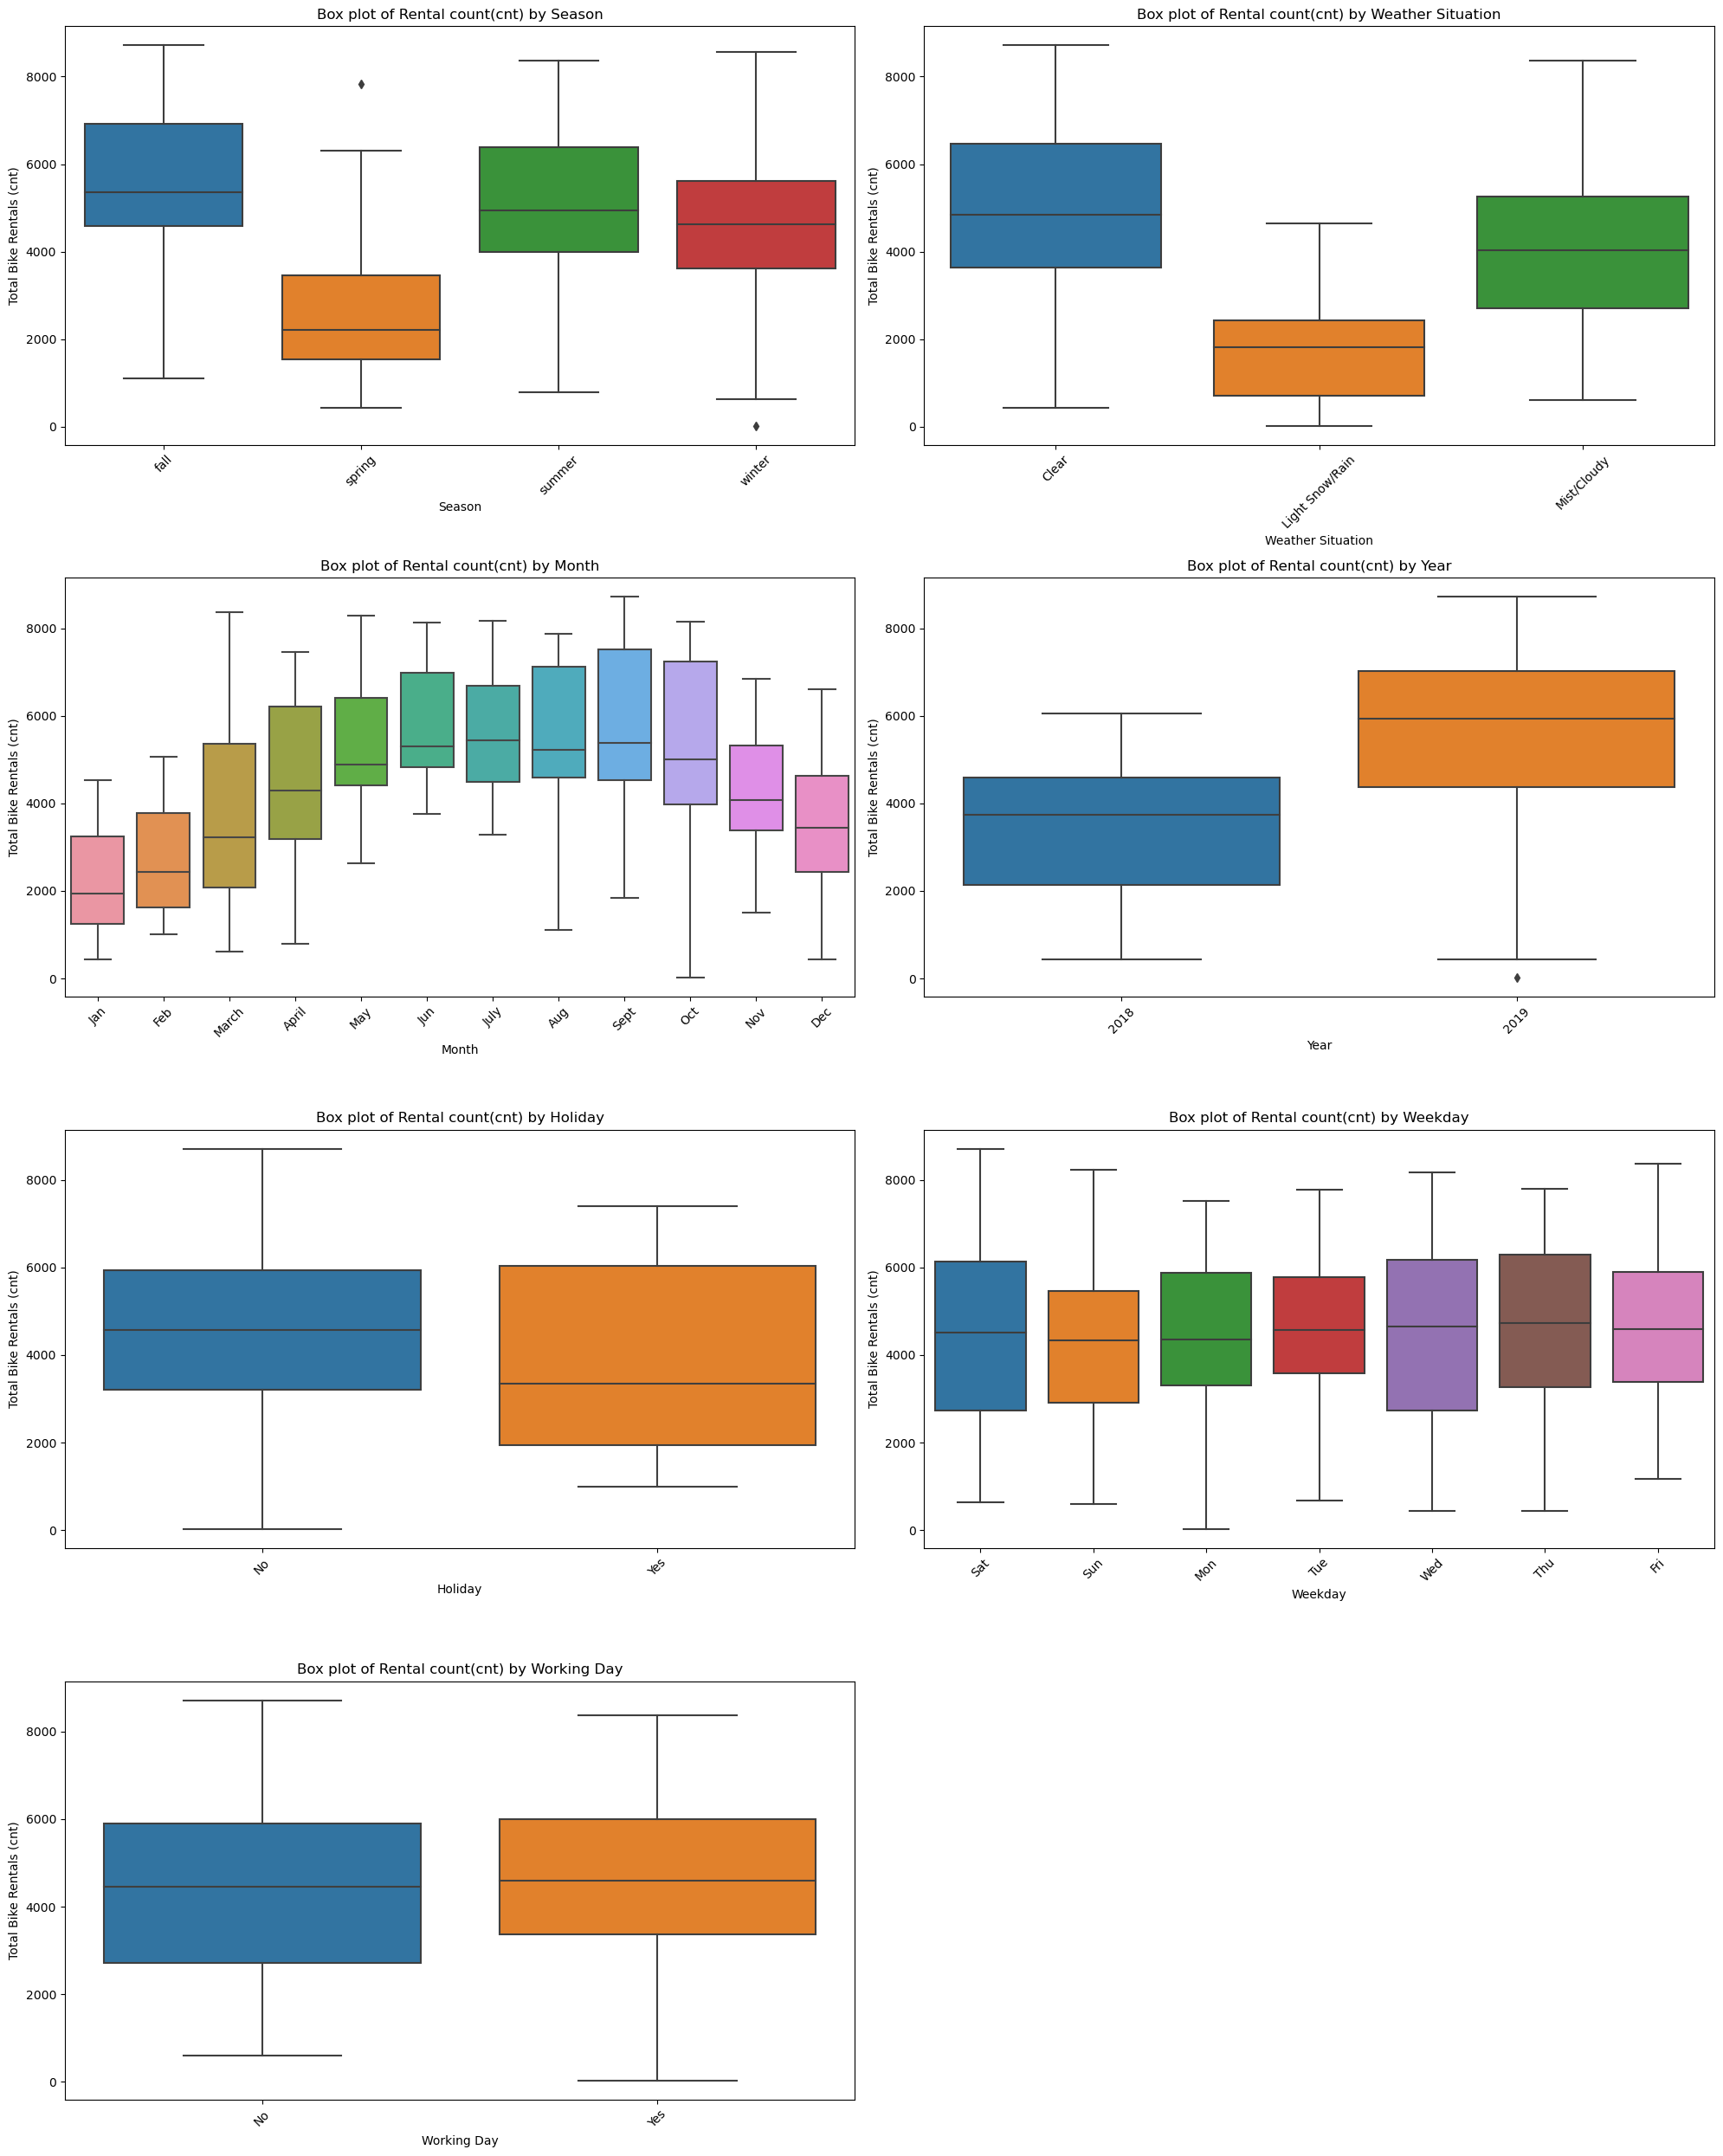

In [21]:
categorical_col = ['season', 'weathersit', 'mnth', 'yr', 'holiday', 'weekday', 'workingday']

mnth_order = ['Jan', 'Feb', 'March', 'April', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

bike_sharing_cleaned['mnth'] = pd.Categorical(bike_sharing_cleaned['mnth'], categories=mnth_order, ordered=True)

# Generate box plots for all categorical columns with respect to the target variable 'cnt'
plt.figure(figsize=(20, 25))

description = {"cnt" : "Rental count(cnt)", "weathersit": "Weather Situation", "season" :"Season", "mnth" : "Month", "holiday":"Holiday", 
               "weekday":"Weekday", "yr": "Year", "workingday" : "Working Day"}

for i, column in enumerate(categorical_col, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=bike_sharing_cleaned[column], y=bike_sharing_cleaned['cnt'])
    plt.title(f'Box plot of {description["cnt"]} by {description[column]}')
    plt.xlabel(description[column])
    plt.ylabel('Total Bike Rentals (cnt)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Season
  - Higher median bike rentals during summer and fall compared to spring and winter.
  - Winter has the lowest median bike rentals, indicating seasonality affects bike rentals significantly.
    
Observation:
Seasonality should be considered in the model as it has a significant impact on bike rentals.

- Weather Situation (weathersit)
  - Clear weather conditions have the highest median bike rentals.
  - Adverse weather conditions like Heavy Rain/Snow have significantly lower bike rentals.
    
Observation:
Weather conditions are important predictors for bike rentals and should be included in the model.

- Month (mnth)
  - There are noticeable variations in bike rentals across different months.
  - Peak rentals observed during warmer months (May, June, July, etc.).
    
Observation:
Monthly variations suggest that month can be a useful predictor for the model, capturing seasonal trends.

- Year (yr)
  - An increasing trend in bike rentals from 2018 to 2019, indicating growing popularity.
    
Observation:
Including the year in the model can help capture the trend of increasing bike rentals over time.

- Holiday
  - Non-holidays have higher median bike rentals compared to holidays.
    
Observation:
Day type (holiday or not) can affect bike rentals and should be considered in the model

- Weekday
  - Variations in bike rentals across different days of the week.
  - Slightly higher rentals on weekdays compared to weekends.
    
Observation:
Overall, no significant difference in rentals across weekdays is observed.

- Working Day
  - Higher median bike rentals on working days compared to non-working days.
    
Observation:
Working days can affect bike rentals, making it a relevant feature for the model.

### Visualize Outliers with Box Plots

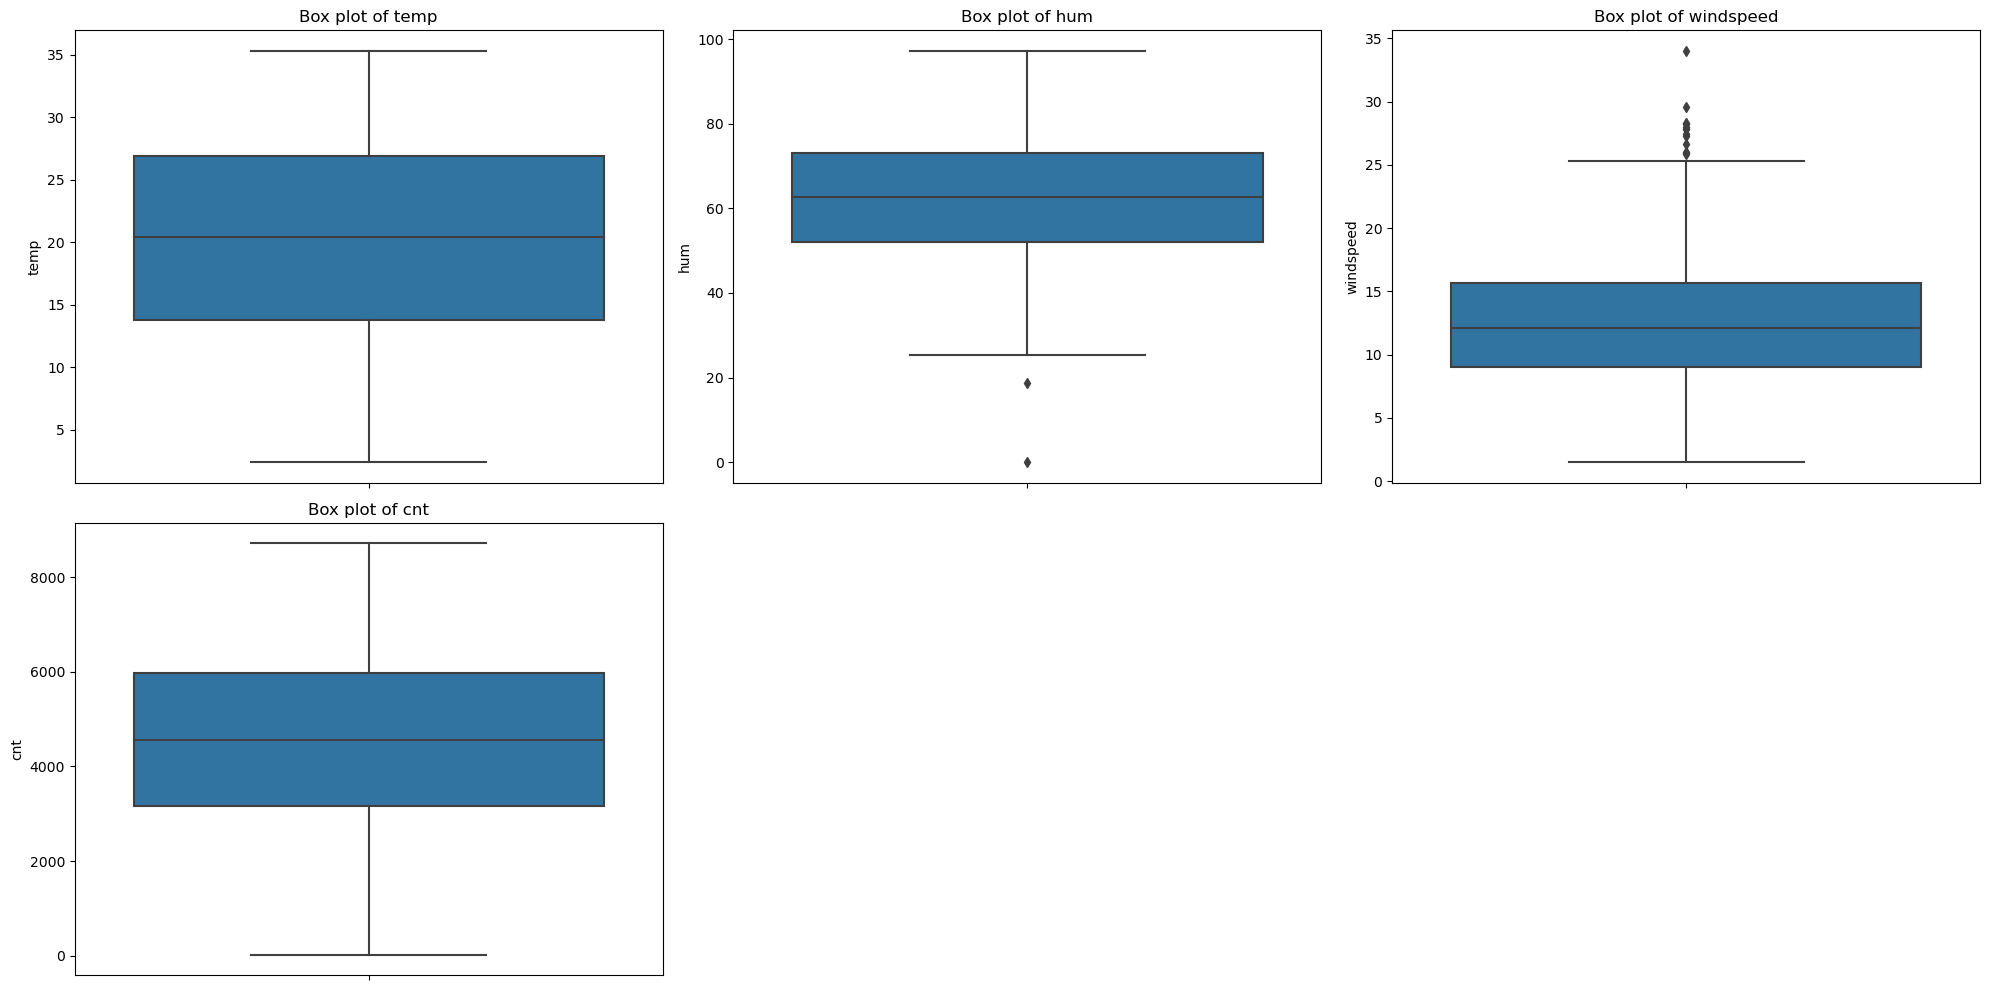

In [22]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=bike_sharing_cleaned[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [23]:
def identify_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

# Identify outliers using IQR method
outliers = identify_outliers(bike_sharing_cleaned, numerical_cols)

# Display the number of outliers for each numerical column
for feature, outlier_data in outliers.items():
    print(f'Number of outliers in {feature}: {outlier_data.count()}')

Number of outliers in temp: 0
Number of outliers in hum: 2
Number of outliers in windspeed: 13
Number of outliers in cnt: 0


In [24]:
#### small number of outliers we can ignored

In [25]:
bike_sharing_cleaned.shape

(730, 11)

### Bivariate Analysis - Categorical

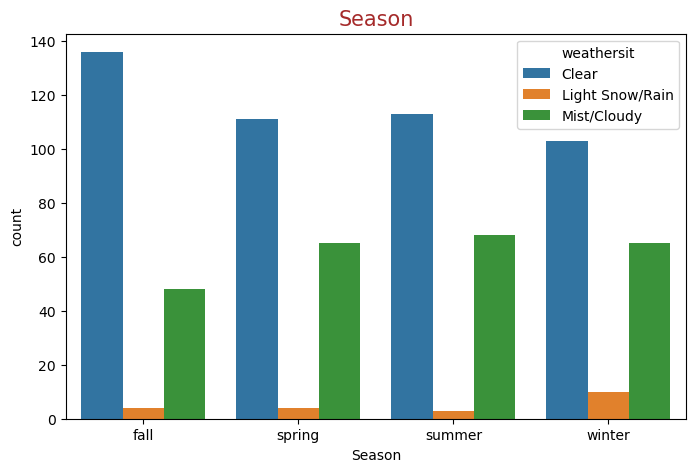

In [26]:
# Plotting Season - Weather

plt.figure(figsize = [8,5])
sns.countplot(x = bike_sharing_cleaned['season'], hue=bike_sharing_cleaned['weathersit'])
plt.title('Season', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Season')
plt.show()

- Most of the days in Fall season were good with clear sky followed by Summer, Spring and Winter.
- Winter has most number of bad weather days.

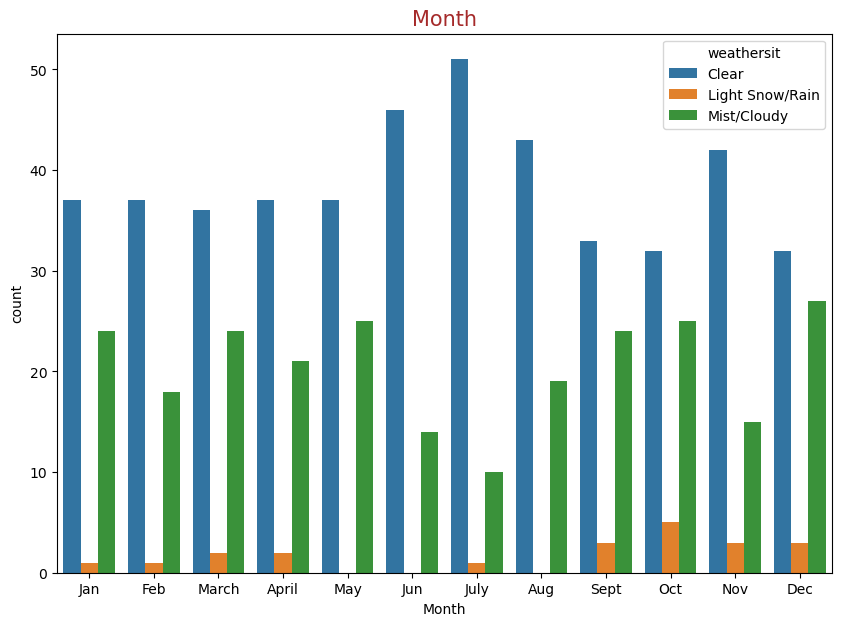

In [27]:
#  Month - Weather
plt.figure(figsize = [10,7])
sns.countplot(x = bike_sharing_cleaned['mnth'], hue=bike_sharing_cleaned['weathersit'])
plt.title('Month', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Month')
plt.show()


- Most of the days in the month of June, July, August and November are good weather days.
- October has the most number of bad weather days with heavy shower/snow.

### Bivariate Analysis - Categorical - Continuous

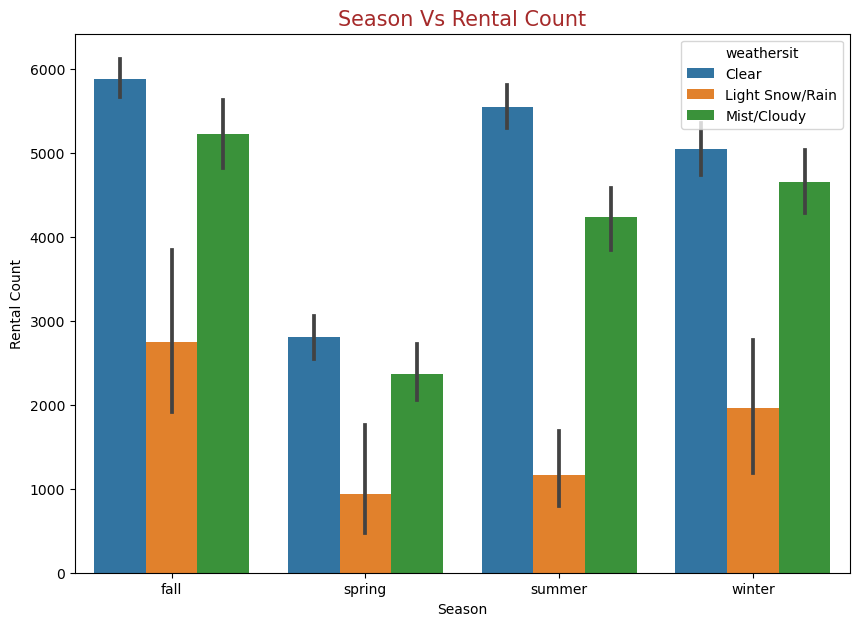

In [28]:
# Season - Rental Count

plt.figure(figsize=[10,7])
sns.barplot(x=bike_sharing_cleaned['season'],y=bike_sharing_cleaned['cnt'], hue = bike_sharing_cleaned['weathersit'])
plt.title('Season Vs Rental Count', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.show()

- Rental count was the highest in the Fall season irrespective of the weather condition.
- Spring season has the lowest demand.

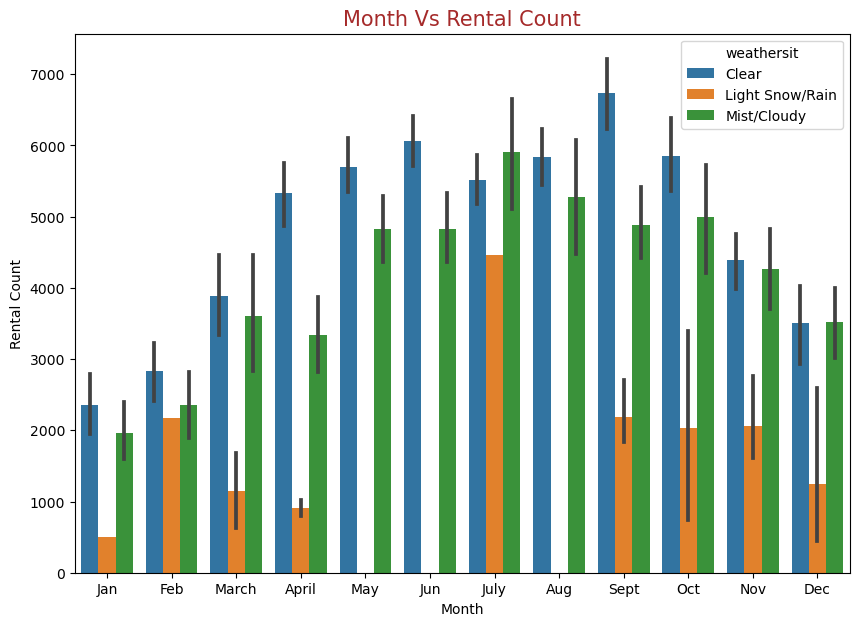

In [29]:
# Plotting Month - Rental Count with Weather

plt.figure(figsize=[10,7])
sns.barplot(x=bike_sharing_cleaned['mnth'],y=bike_sharing_cleaned['cnt'], hue = bike_sharing_cleaned['weathersit'])
plt.title('Month Vs Rental Count', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.show()

- In most months if the weather is good/fair, demand is higher.
- In July, irrespective of the weather conditions, demand is high.
- The demand is the lowest in January.

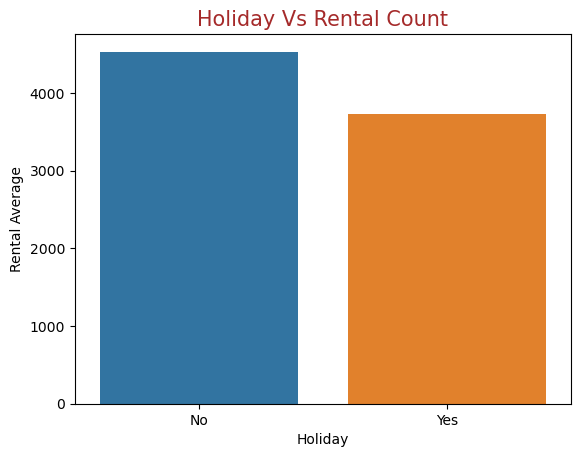

In [30]:
# Check if holidays have an impact on demand

holiday_df = bike_sharing_cleaned.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df)
plt.xlabel('Holiday')
plt.ylabel('Rental Average')
plt.title('Holiday Vs Rental Count', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- Looks like holidays have less demand.

## Step 3: Data Preparation

In [31]:
## creating dummy variables
bike_sharing_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No,Sat,No,Mist/Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No,Sun,No,Mist/Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No,Mon,Yes,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No,Tue,Yes,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No,Wed,Yes,Clear,9.305237,43.6957,12.522300,1600


In [32]:
bike_sharing_final = pd.get_dummies(bike_sharing_cleaned, columns=['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'workingday', 'yr'], drop_first=True, dtype=int)

In [33]:
bike_sharing_final.shape

(730, 29)

In [34]:
bike_sharing_final.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Snow/Rain', 'weathersit_Mist/Cloudy',
       'mnth_Feb', 'mnth_March', 'mnth_April', 'mnth_May', 'mnth_Jun',
       'mnth_July', 'mnth_Aug', 'mnth_Sept', 'mnth_Oct', 'mnth_Nov',
       'mnth_Dec', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'holiday_Yes', 'workingday_Yes',
       'yr_2019'],
      dtype='object')

In [35]:
bike_sharing_final.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy,mnth_Feb,...,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,holiday_Yes,workingday_Yes,yr_2019
0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets


In [36]:
## import necessary library for builing the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [37]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_sharing_final, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [38]:
scaler = MinMaxScaler()

In [39]:
## Apply Scaler

In [40]:
num_vars_scale = ['temp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars_scale] = scaler.fit_transform(bike_train[num_vars_scale])

In [41]:
bike_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy,mnth_Feb,...,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,holiday_Yes,workingday_Yes,yr_2019
653,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
576,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
426,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
482,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [42]:
bike_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy,mnth_Feb,...,mnth_Dec,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,holiday_Yes,workingday_Yes,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.066667,...,0.084314,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.025490,0.676471,0.507843
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.249689,...,0.278131,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.157763,0.468282,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


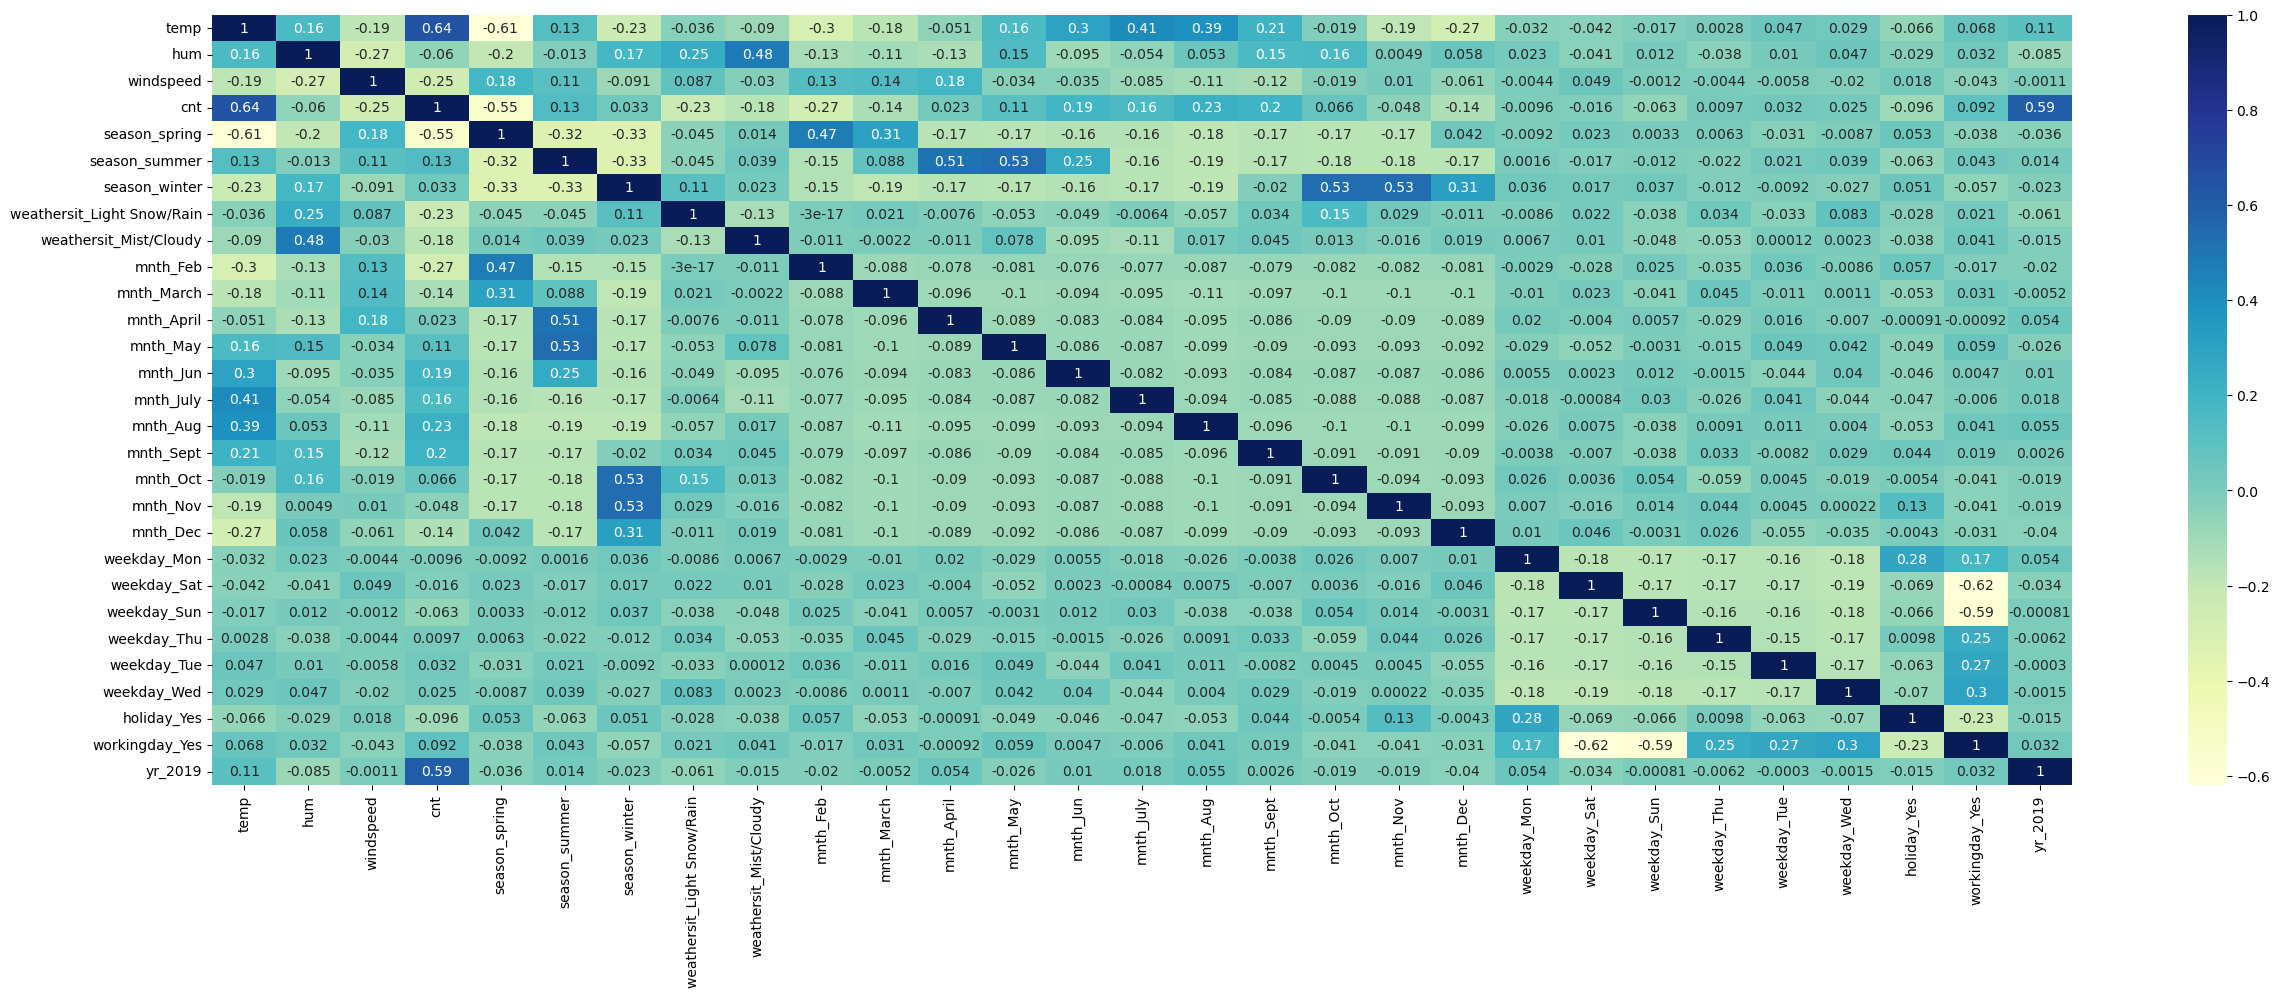

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [44]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model

### Assumptions
#### Before building the model, let's put the assumptions of a linear regression model -

- There is a linear relationship between X and y
- Error terms are normally distributed with a mean value 0
- Error terms have constant variance ( homoscedasticity )
- Error terms are independent of each other ( no multicollinearity )
- Also we are going to assume 95% confidence interval. So, we will take into consideration p-value below 5% or p-value < 0.05. Similarly we will assume VIF limit of 5.

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin by default.







# Model 1: Linear regression


In [45]:
## taking temp column as a feature for model
X_train_lm = sm.add_constant(X_train['temp'])

# Build and fit the OLS model
model = sm.OLS(y_train, X_train_lm)
results = model.fit()

# Print the summary of the model
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        21:48:39   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust  

# Model 2: Multiple linear regression model using all variables
#### Rebuilding the model with all columns

In [46]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Snow/Rain', 'weathersit_Mist/Cloudy',
       'mnth_Feb', 'mnth_March', 'mnth_April', 'mnth_May', 'mnth_Jun',
       'mnth_July', 'mnth_Aug', 'mnth_Sept', 'mnth_Oct', 'mnth_Nov',
       'mnth_Dec', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'holiday_Yes', 'workingday_Yes',
       'yr_2019'],
      dtype='object')

In [47]:
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.74e-182
Time:                        21:48:40   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust  

In [48]:
def calculate_vif(X):
    # Calculating VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data['VIF'] = round(vif_data['VIF'], 2)
    vif_data = vif_data.sort_values(by = "VIF", ascending = False)
    return vif_data

In [49]:
calculate_vif(X_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Feature,VIF
26,workingday_Yes,77.79
20,weekday_Sat,17.90
21,weekday_Sun,16.92
3,season_spring,10.79
14,mnth_Aug,9.88
5,season_winter,9.50
13,mnth_July,8.90
4,season_summer,8.29
0,temp,7.12
12,mnth_Jun,6.83


### Observation
#### Some variables have very high VIF values and high p-values, so it is better to use Recursive Feature Elimination (RFE) to determine the best variables.


In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [52]:
#Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist/Cloudy', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_March', True, 1),
 ('mnth_April', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_July', False, 8),
 ('mnth_Aug', True, 1),
 ('mnth_Sept', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Nov', False, 9),
 ('mnth_Dec', False, 10),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 14),
 ('holiday_Yes', True, 1),
 ('workingday_Yes', False, 4),
 ('yr_2019', True, 1)]

In [53]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Feb', 'mnth_July', 'mnth_Oct', 'mnth_Nov',
       'mnth_Dec', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes'],
      dtype='object')

In [54]:
# selecting columns based of RFE
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_Light Snow/Rain', 'weathersit_Mist/Cloudy', 'mnth_March',
       'mnth_April', 'mnth_May', 'mnth_Jun', 'mnth_Aug', 'mnth_Sept',
       'holiday_Yes', 'yr_2019'],
      dtype='object')

In [55]:
## train selected feature via RFE
X_train_RFE = X_train[selected_features]

In [56]:
X_train_RFE.head()

,temp,hum,windspeed,season_spring,season_winter,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy,mnth_March,mnth_April,mnth_May,mnth_Jun,mnth_Aug,mnth_Sept,holiday_Yes,yr_2019
653,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0,0,1
576,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,1
426,0.442393,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0,0,1
482,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0,0,1


# Model 3 - Using RFE

In [57]:
X_train_RFE_lm = sm.add_constant(X_train_RFE)
model_3 = sm.OLS(y_train, X_train_RFE_lm).fit()
print(model_3.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.99e-188
Time:                        21:48:42   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust  

#### Checking VIF

In [58]:
vif_result = calculate_vif(X_train_RFE)
print(vif_result)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


High `p-values` indicate that the variable is not `statistically significant` in predicting the `target variable`. Removing these variables simplifies the model and helps focus on the variables that are `statistically significant`.

# Model 4
#### removing `hum` as high `VIF value` and rebuilding model

In [59]:
X_train_new = X_train_RFE.drop(["hum"], axis = 1)

In [60]:
X_train_new_lm = sm.add_constant(X_train_new)
model_4 = sm.OLS(y_train, X_train_new_lm).fit()
print(model_4.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.23e-185
Time:                        21:48:42   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust  

In [61]:
vif_result = calculate_vif(X_train_new)
print(vif_result)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


`Temp has high correlation with bike rental and high correlation between an independent variable and the dependent variable indicates a strong linear relationship, here temp independent variable is an important predictor`

# Model 5
#### removing `mnth_Aug` as high `p-value` and rebuilding model

In [62]:
X_train_new = X_train_new.drop(["mnth_Aug"], axis = 1)

In [63]:
X_train_new_lm = sm.add_constant(X_train_new)
model_5 = sm.OLS(y_train, X_train_new_lm).fit()
print(model_5.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.73e-185
Time:                        21:48:43   Log-Likelihood:                 498.70
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     496   BIC:                            -910.1
Df Model:                          13                                         
Covariance Type:            nonrobust  

In [64]:
vif_result = calculate_vif(X_train_new)
print(vif_result)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### p-values < 0.5  and VIF < 5, both are correct

## Step 6: Residual Analysis of the train data


#### let us plot the histogram of the error terms and see what it looks like.

In [65]:
final_model = model_5

In [66]:
y_train_pred = final_model.predict(X_train_new_lm)

Text(0.5, 0, 'Errors')

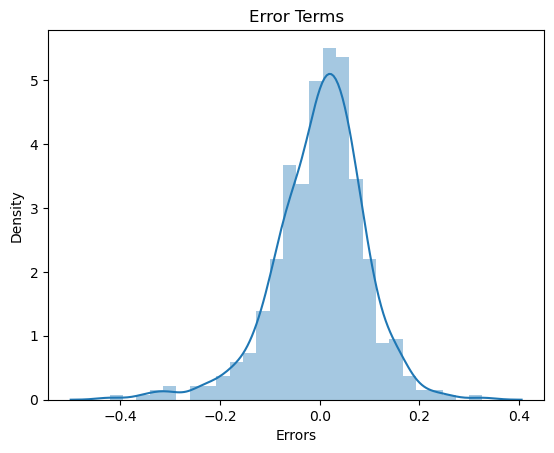

In [67]:
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

### Interpretation
1. The errors are centered around zero, which is a good sign. This indicates that the model does not have a consistent bias in one direction.
2. The density curve resembles a normal distribution (bell curve), which is also a positive indicator. Normally distributed errors suggest that the model captures the data patterns well and that the errors are random.
3. The spread of the errors (width of the distribution) indicates the model's accuracy. A narrower spread would indicate more precise predictions, whereas a wider spread indicates more variation in the error terms.

### Assessment
- **Good Model Indicators**: 
  - Errors centered around zero.
  - Symmetrical, bell-shaped distribution of errors.
  - Minimal skewness (no long tails in one direction).

Based on the visualization, it seems like the model is performing well, with errors centered around zero and following a roughly normal distribution.


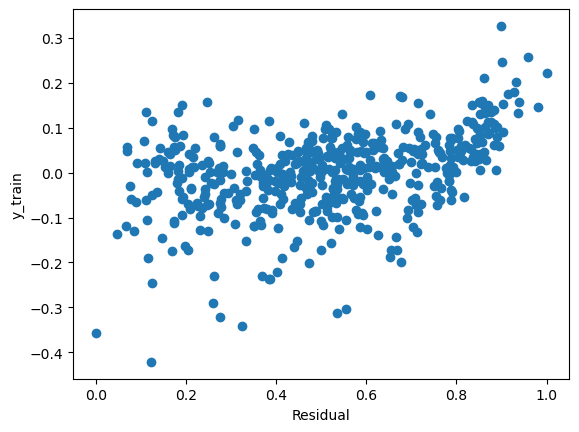

In [68]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Interpretation
1. **Pattern**: Ideally, residuals should be randomly scattered around the horizontal axis (residual = 0). This indicates that the errors are randomly distributed and that the model is unbiased.
2. **Homoscedasticity**: The spread of residuals should be constant across all levels of the predicted values. If the spread increases or decreases with the predicted values, it indicates heteroscedasticity, which means the variance of the errors is not constant.
3. **No Clear Patterns**: There should be no obvious patterns (e.g., a funnel shape, a curve, or clusters). Clear patterns in the residuals can indicate that the model is not capturing some aspect of the data.

### Assessment
- **Good Model Indicators**:
  - Residuals are randomly scattered without any distinct pattern.
  - The spread of residuals is consistent across all predicted values (homoscedasticity).
  - Residuals are centered around zero, indicating no systematic bias.


## Step 7: Making Predictions Using the Final Model 5

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 9th model.

In [69]:
bike_test[num_vars_scale] = scaler.transform(bike_test[num_vars_scale])

#### Dividing into X_test and y_test

In [70]:
bike_test_org = bike_test[bike_test.columns]
y_test = bike_test.pop('cnt')
X_test = bike_test

In [71]:
X_test = X_test[X_train_new.columns]
X_test_m = sm.add_constant(X_test)

In [72]:
y_test_pred = final_model.predict(X_test_m)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [73]:
r2_score(y_true=y_test, y_pred = y_test_pred)

0.8109516074549654

Text(0, 0.5, 'y_pred')

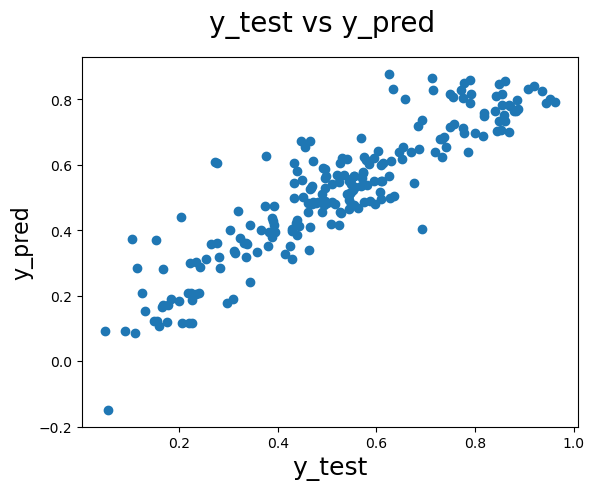

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### Interpretation

Overall, this `y_test` vs `y_pred` plot suggests that the regression model is performing well and making accurate predictions. The model appears to be reliable, as indicated by the closeness of the points to the 45-degree line and the lack of systematic bias in the predictions.

### Summary of Key Points

- **Closeness to the 45-degree Line**: Indicates accurate predictions by the model.
- **No Systematic Bias**: Even distribution of points around the line suggests unbiased predictions.
- **Consistent Errors**: Uniform spread of points indicates consistent prediction errors.
- **Minor Outliers**: Few outliers that do not significantly impact overall performance.

Overall, the model appears to be reliable and well-fitted to the data, as indicated by the `y_test` vs `y_pred` plot.


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

mse, mae, rmse

(0.008979006183438424, 0.07147896664935897, 0.09475761807600708)

### Explanation of Errors

1. **Mean Squared Error (MSE)**:
   - **Value**: In this case, the MSE is 0.0089.
   - **Interpretation**: A lower MSE indicates a better fit of the model. However, it is sensitive to outliers since it squares the errors.

2. **Mean Absolute Error (MAE)**:
   - **Value**: In this case, the MAE is 0.0714.
   - **Interpretation**: MAE is a measure of errors in the same units as the target variable and is less sensitive to outliers compared to MSE.

4. **Root Mean Squared Error (RMSE)**:
   - **Value**: In this case, the RMSE is 0.0947.
   - **Interpretation**: RMSE gives an idea of the magnitude of error and is in the same units as the target variable. Lower RMSE indicates better fit and is useful for understanding the magnitude of prediction errors.

### Interpretation

Overall, the low values of MSE, MAE, and RMSE suggest that the regression model is performing well and making accurate predictions. The model appears to be reliable, with errors that are relatively small and consistent.

- **MSE (0.0089)**: Indicates a low average squared error.
- **MAE (0.0714)**: Indicates a low average absolute error.
- **RMSE (0.0947)**: Indicates a low average error magnitude in the same units as the target variable.

Overall, these error metrics suggest that the model is performing well and is a good fit for the data.


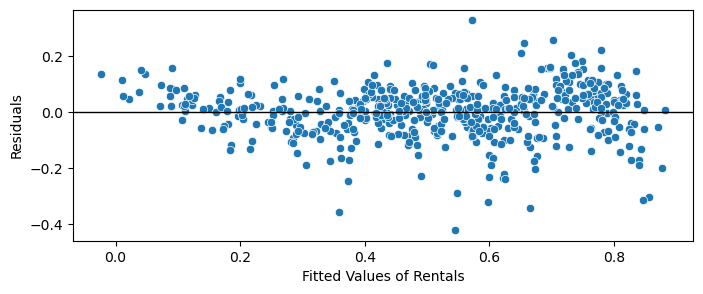

In [76]:
# Create a scatter plot between the fitted values of 'rentals' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = final_model.fittedvalues, y = final_model.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Rentals')
plt.ylabel('Residuals');

### Interpretation

Overall, this residuals vs. fitted values plot suggests that the regression model is performing well and that the assumptions underlying the model are being met. The model appears to be reliable, as indicated by the random scatter of residuals around the horizontal line at zero.

- **Random Scatter**: Indicates that the model captures the relationship between the features and the target variable well.
- **No Clear Patterns**: Suggests that the model's assumptions are likely valid.
- **Consistency**: Indicates homoscedasticity, or constant variance of residuals.
- **Minor Outliers**: Suggests that the model is generally reliable, with few outliers that do not significantly impact overall performance.

Overall, the model appears to be reliable and well-fitted to the data, as indicated by the residuals vs. fitted values plot.


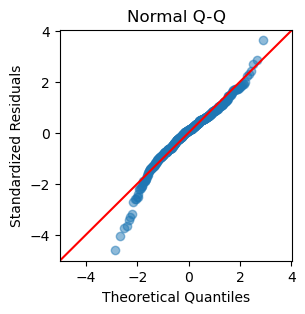

In [77]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(final_model.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

### Interpretation

Overall, this Q-Q plot suggests that the regression model's residuals are approximately normally distributed, with some deviations in the tails. This indicates that the model is performing well in terms of the normality assumption for the residuals, which is important for the validity of many statistical tests and confidence intervals.

- **Closeness to the 45-degree Line**: Indicates that the residuals are approximately normally distributed.
- **Minor Deviations at Tails**: Suggests some non-normality in the extreme values, which is common and often acceptable in real-world data.
- **Overall Good Fit**: The model appears to be reliable and well-fitted to the data, as indicated by the normality of the residuals in the central range.

Overall, the model appears to be performing well, with residuals that are close to normally distributed, indicating a good fit.


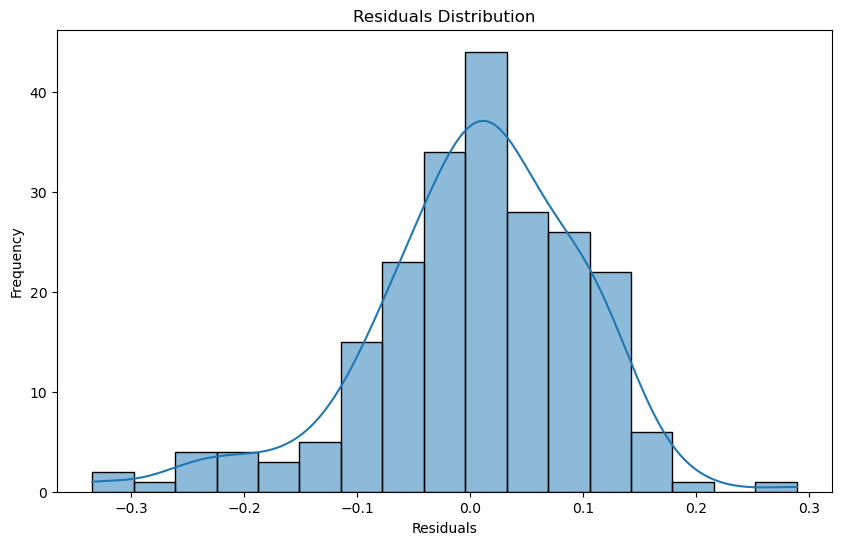

In [78]:
# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Interpretation

Overall, this histogram suggests that the model is well-fitted to the data, as the residuals are normally distributed and centered around zero, with only a few outliers. This is a good indication of a reliable regression model.

- **Normal Distribution of Errors**: The normal distribution of residuals suggests that the model's assumption of normally distributed errors is met.
- **Centered Around Zero**: The residuals being centered around zero indicates that the model is not biased and performs well on average.
- **Consistency**: The spread of the residuals is relatively small, indicating good model performance in terms of prediction accuracy.

Overall, the model appears to be reliable and well-fitted to the data, as indicated by the distribution of the residuals.


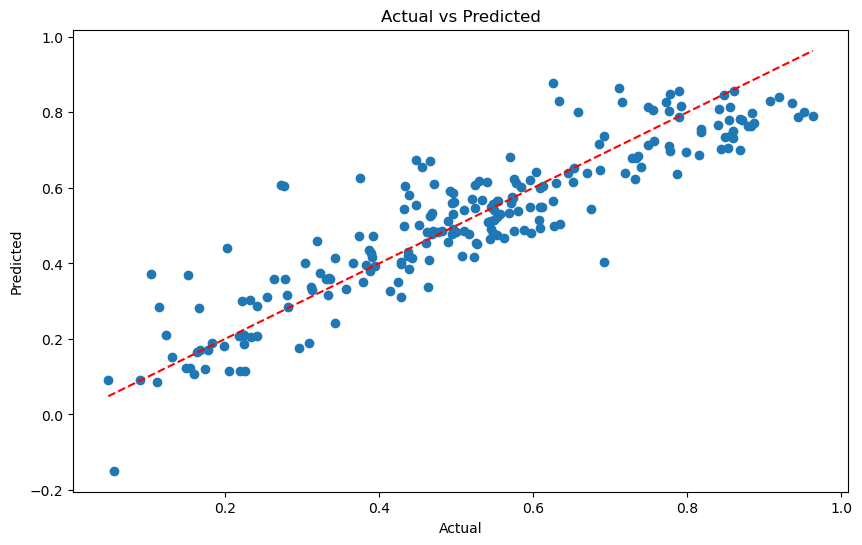

In [79]:

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Interpretation

Overall, this actual vs. predicted plot suggests that the regression model is performing well and making accurate predictions. The model appears to be reliable, as indicated by the closeness of the points to the 45-degree line and the lack of systematic bias in the predictions.

- **Closeness to the 45-degree Line**: Indicates accurate predictions by the model.
- **No Systematic Bias**: Even distribution of points around the line suggests unbiased predictions.
- **Consistent Errors**: Uniform spread of points indicates consistent prediction errors.
- **Minor Outliers**: Few outliers that do not significantly impact overall performance.

Overall, the model appears to be reliable and well-fitted to the data, as indicated by the actual vs. predicted plot.


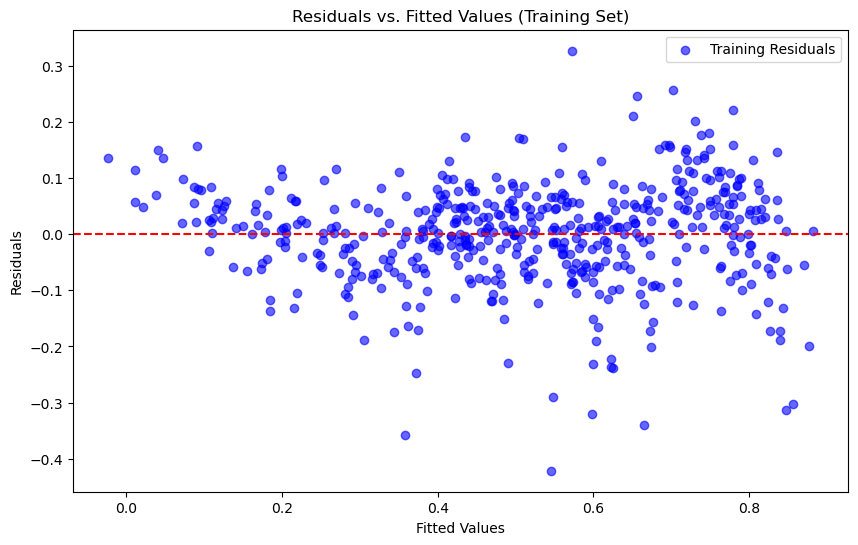

In [80]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
# Plot residuals vs. fitted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.6, label='Training Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Interpretation

Overall, this residuals vs. fitted values plot suggests that the regression model is performing well and that the assumptions underlying the model are being met. The model appears to be reliable, as indicated by the random scatter of residuals around the horizontal line at zero.

- **Normal Distribution of Errors**: The normal distribution of residuals suggests that the model's assumption of normally distributed errors is met.
- **Centered Around Zero**: The residuals being centered around zero indicates that the model is not biased and performs well on average.
- **Consistency**: The spread of the residuals is relatively small, indicating good model performance in terms of prediction accuracy.

Overall, the model appears to be reliable and well-fitted to the training data, as indicated by the distribution of the residuals.


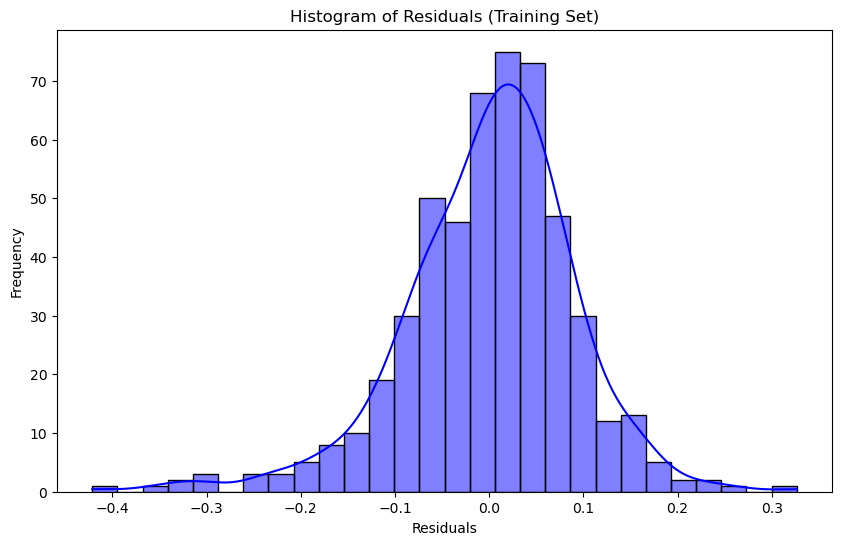

In [81]:
# Plot histogram of residuals for the training set
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue')
plt.title('Histogram of Residuals (Training Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Interpretation

Overall, this histogram suggests that the model is well-fitted to the data, as the residuals are normally distributed and centered around zero, with only a few outliers. This is a good indication of a reliable regression model.

- **Normal Distribution of Errors**: The normal distribution of residuals suggests that the model's assumption of normally distributed errors is met.
- **Centered Around Zero**: The residuals being centered around zero indicates that the model is not biased and performs well on average.
- **Consistency**: The spread of the residuals is relatively small, indicating good model performance in terms of prediction accuracy.

Overall, the model appears to be reliable and well-fitted to the training data, as indicated by the distribution of the residuals.


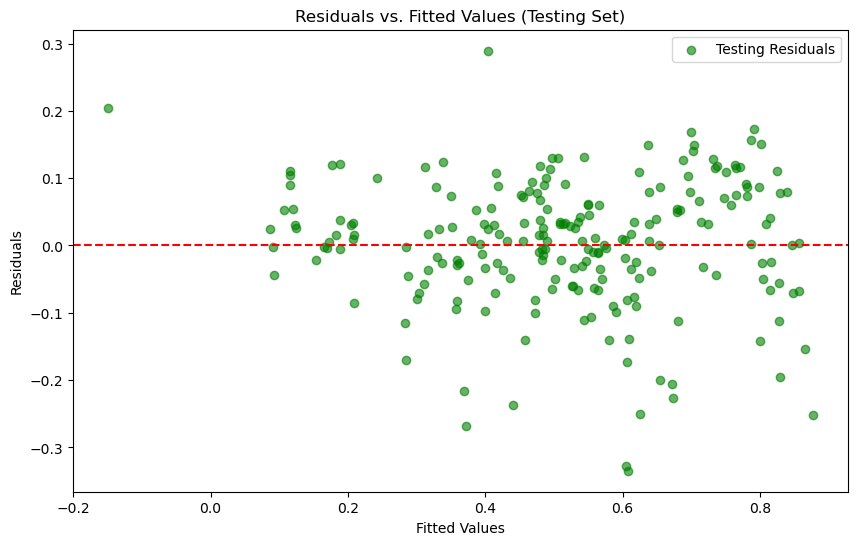

In [82]:
# Plot residuals vs. fitted values for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, test_residuals, color='green', alpha=0.6, label='Testing Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Testing Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Interpretation

Overall, this residuals vs. fitted values plot suggests that the regression model is performing well and that the assumptions underlying the model are being met. The model appears to be reliable, as indicated by the random scatter of residuals around the horizontal line at zero.


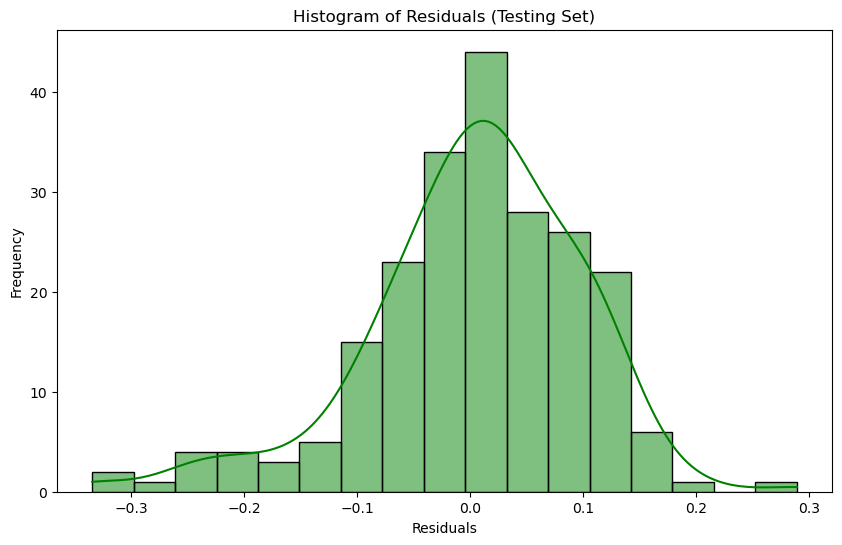

In [83]:
# Plot histogram of residuals for the testing set
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, color='green')
plt.title('Histogram of Residuals (Testing Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Interpretation

- **Normal Distribution of Errors**: The normal distribution of residuals suggests that the model's assumption of normally distributed errors is met.
- **Centered Around Zero**: The residuals being centered around zero indicates that the model is not biased and performs well on average.
- **Consistency**: The spread of the residuals is relatively small, indicating good model performance in terms of prediction accuracy.

Overall, this histogram suggests that the model is well-fitted to the data, as the residuals are normally distributed and centered around zero, with only a few outliers. This is a good indication of a reliable regression model.


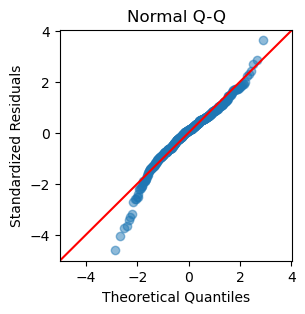

In [84]:
QQ = ProbPlot(final_model.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


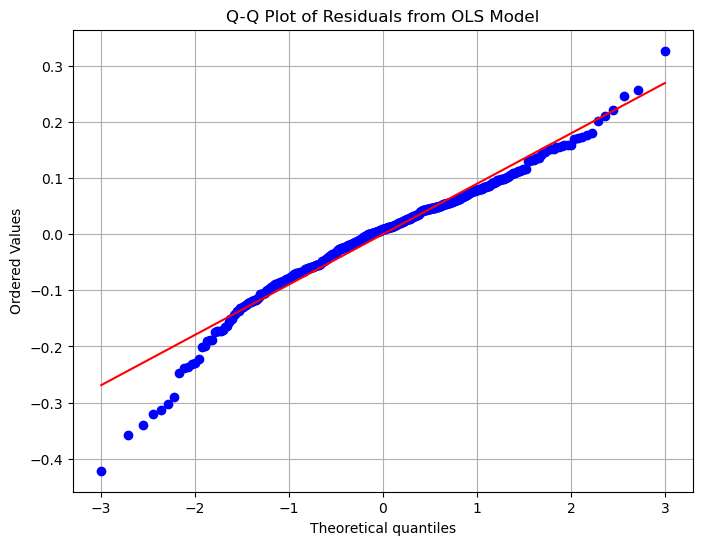

In [85]:
# Q-Q plot of the residuals
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(final_model.resid, dist="norm", plot=ax)
ax.set_title('Q-Q Plot of Residuals from OLS Model')
ax.grid(True)
plt.show()

### Overall Conclusion

- **Good Model Fit**: The low values of MSE, MAE, and RMSE, along with the visualizations, suggest that the model is likely a good fit for the data.
- **No Systematic Bias**: The lack of clear patterns and even distribution in the visualizations indicate that the model's predictions are unbiased and accurate on average.
- **Consistency**: The consistent spread of residuals and uniform error metrics suggest that the model's prediction errors are consistent across different levels of the target variable.
- **Minor Outliers**: While there are a few outliers, they do not significantly impact the overall performance of the model.

Overall, the model appears to be reliable, well-fitted to the data, and performs well in making accurate predictions.


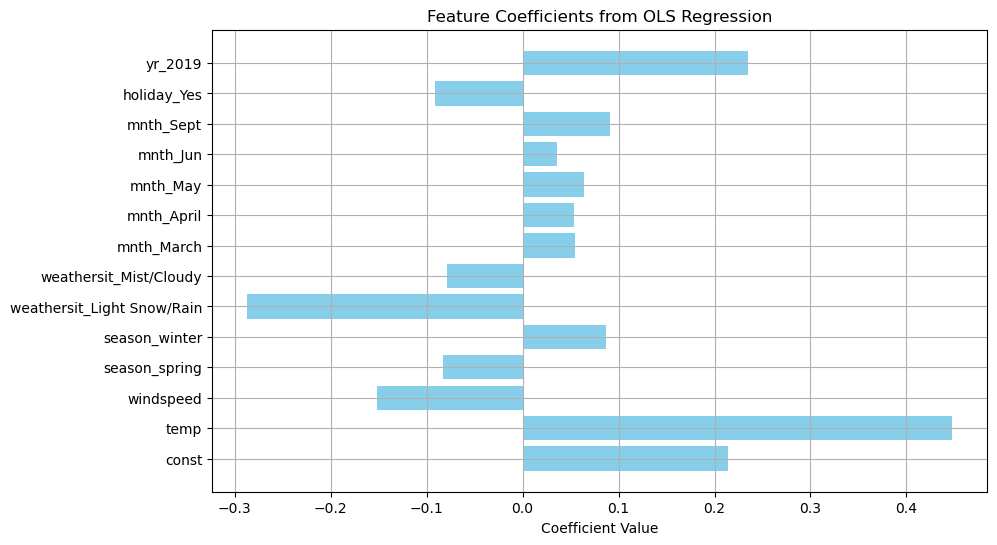

In [86]:
# Manually creating the coefficients and feature names as extracted from the model
coefficients = {
    'Features': ['const', 'temp', 'windspeed', 'season_spring', 'season_winter', 
                 'weathersit_Light Snow/Rain', 'weathersit_Mist/Cloudy', 'mnth_March', 
                 'mnth_April', 'mnth_May', 'mnth_Jun', 'mnth_Sept', 'holiday_Yes', 'yr_2019'],
    'Coefficients': [0.2144, 0.4474, -0.1517, -0.0828, 0.0866, -0.2870, -0.0793, 
                     0.0542, 0.0534, 0.0643, 0.0362, 0.0911, -0.0910, 0.2346]
}

df = pd.DataFrame(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(df['Features'], df['Coefficients'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from OLS Regression')
plt.grid(True)
plt.show()


#### Since the coefficients of the independent variables are significant, we can reject the null hypothesis.

## Detailed Coefficients
- **const**: `0.2144` - The intercept of the regression equation.
- **temp**: `0.4474` - For each unit increase in temperature, the dependent variable increases by 0.4474 units, holding other variables constant.
- **windspeed**: `-0.1517` - For each unit increase in windspeed, the dependent variable decreases by 0.1517 units, holding other variables constant.
- **season_spring**: `-0.0828` - Being in the spring season decreases the dependent variable by 0.0828 units compared to the reference season, holding other variables constant.
- **season_winter**: `0.0866` - Being in the winter season increases the dependent variable by 0.0866 units compared to the reference season, holding other variables constant.
- **weathersit_Light Snow/Rain**: `-0.2870` - Light snow or rain decreases the dependent variable by 0.2870 units compared to clear weather, holding other variables constant.
- **weathersit_Mist/Cloudy**: `-0.0793` - Mist or cloudy weather decreases the dependent variable by 0.0793 units compared to clear weather, holding other variables constant.
- **mnth_March**: `0.0542` - Being in March increases the dependent variable by 0.0542 units compared to other months, holding other variables constant.
- **mnth_April**: `0.0534` - Being in April increases the dependent variable by 0.0534 units compared to other months, holding other variables constant.
- **mnth_May**: `0.0643` - Being in May increases the dependent variable by 0.0643 units compared to other months, holding other variables constant.
- **mnth_Jun**: `0.0362` - Being in June increases the dependent variable by 0.0362 units compared to other months, holding other variables constant.
- **mnth_Sept**: `0.0911` - Being in September increases the dependent variable by 0.0911 units compared to other months, holding other variables constant.
- **holiday_Yes**: `-0.0910` - Being a holiday decreases the dependent variable by 0.0910 units, holding other variables constant.
- **yr_2019**: `0.2346` - Being in the year 2019 increases the dependent variable by 0.2346 units compared to other years, holding other variables constant.

#### We can write the regression equation Based on the coefficients provided in the OLS regression results. The general form of a regression equation is:
    
    cnt = X0 + X1 * temp + X2 * windspeed + X3 * season_spring + ... + X13 * yr_2019

    Using the coefficients from the OLS results:

    - X0 = 0.2144 (constant term)
    - X1 = 0.4474 (temp)
    - X2 = -0.1517 (windspeed)
    - X3 = -0.0828 (season_spring)
    - X4 = 0.0866 (season_winter)
    - X5 = -0.2870 (weathersit_Light Snow/Rain)
    - X6 = -0.0793 (weathersit_Mist/Cloudy)
    - X7 = 0.0542 (mnth_March)
    - X8 = 0.0534 (mnth_April)
    - X9 = 0.0643 (mnth_May)
    - X10 = 0.0362 (mnth_Jun)
    - X11 = 0.0911 (mnth_Sept)
    - X12 = -0.0910 (holiday_Yes)
    - X13 = 0.2346 (yr_2019)

    The regression equation can be written as:

    cnt = 0.2144 + 0.4474 * temp - 0.1517 * windspeed - 0.0828 * season_spring + 0.0866 * season_winter 
    - 0.2870 * weathersit_Light Snow/Rain - 0.0793 * weathersit_Mist/Cloudy + 0.0542 * mnth_March 
    + 0.0534 * mnth_April + 0.0643 * mnth_May + 0.0362 * mnth_Jun + 0.0911 * mnth_Sept 
    - 0.0910 * holiday_Yes + 0.2346 * yr_2019

    This equation predicts the cnt variable (the dependent variable) based on the given independent variables and their corresponding coefficients 

#### Since the coefficients of the independent variables are significant, we can reject the null hypothesis.

feature with the highest impact (absolute value of the coefficient) on the rental bike count is:

- Temperature (temp): The coefficient for temperature is 0.4474, which means that for each unit increase in temperature, the rental bike count increases by 0.4474 units, holding all other variables constant. This indicates that temperature has the most substantial positive impact on the rental bike count among the features included in the model.
- Year (yr_2019): The coefficient for the year 2019 is 0.2346, which means that being in the year 2019 increases the rental bike count by 0.2346 units compared to other years, holding all other variables constant. This indicates a significant increase in the rental bike count in 2019.
- Weather Situation (weathersit):

    - Light Snow/Rain: The coefficient is -0.2870, indicating that light snow or rain decreases the rental bike count by 0.2870 units compared to clear weather, holding all other variables constant.
    - Mist/Cloudy: The coefficient is -0.0793, indicating that mist or cloudy weather decreases the rental bike count by 0.0793 units compared to clear weather, holding all other variables constant.
- Month:
    - March, April, May, June, September: All these months have positive impacts on the rental bike count, with September having the highest positive impact among the months listed.
 
Note: Full name of some varibale, as we have shorted due to long name
- Short name and their full name of wethersiuation
    - Clear = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - Mist/Cloudy = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Light Snow/Rain = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - Heavy Rain/Snow = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog